<a href="https://colab.research.google.com/github/maimonahST/GP/blob/main/Cross_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pip

# Import

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin,BaseEstimator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepare the data for traning

**Commen Step**

In [4]:
# load data arrays
data_array = np.load('/content/drive/MyDrive/GP/GP-Data/data_array.npy')
label_array = np.load('/content/drive/MyDrive/GP/GP-Data/label_array.npy')
group_array = np.load('/content/drive/MyDrive/GP/GP-Data/group_array.npy')

label_array = label_array.astype('int')

print(data_array.shape,label_array.shape,group_array.shape)

(7150, 1250, 33) (7150,) (7150,)


**Commen Step**

In [ ]:
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)

# Sample for ML modedl with CV

In [27]:
gkf=GroupKFold()

def fit_and_evaluate(model, X_train, y_train, X_test, y_test):

  model.fit(X_train, y_train)

  # Predictions on the test set
  test_predictions = model.predict(X_test)

  # Calculate accuracy, recall, precision, and F1-score
  accuracy = accuracy_score(y_test, test_predictions)
  recall = recall_score(y_test, test_predictions)
  precision = precision_score(y_test, test_predictions)
  f1 = f1_score(y_test, test_predictions)

  # Print the results
  print("Accuracy:", accuracy)
  print("Recall:", recall)
  print("Precision:", precision)
  print("F1-score:", f1)


  print("Classification Report (Test):\n", classification_report(y_test, test_predictions))

  # Compute the confusion matrix for the test set
  cm_test = confusion_matrix(y_test, test_predictions)

  # Plot the confusion matrix for the test set
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title(f"Confusion Matrix for Decision Tree {model.__class__}")
  plt.show()

  return model, accuracy, recall, precision, f1




def CV_ML(data_array , label_array, group_array, model):

  avr_acc = 0
  avr_recall = 0
  avr_prec = 0
  avr_f1 = 0


  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      X_train, y_train = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      X_train=scaler.fit_transform(X_train)
      X_test=scaler.transform(X_test)



      # Flatten the data array for ML models
      X_train = X_train.reshape(X_train.shape[0], -1)
      # X_val = X_val.reshape(X_val.shape[0], -1)
      X_test = X_test.reshape(X_test.shape[0], -1)
      y_train = y_train.reshape(y_train.shape[0], -1)
      # y_val = y_val.reshape(y_val.shape[0], -1)
      y_test = y_test.reshape(y_test.shape[0], -1)


      y_train[y_train==0] = 1
      y_train[y_train==2] = 0
      y_test[y_test==0] = 1
      y_test[y_test==2] = 0


      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")


      _ , acc , recall, precision, f1 = fit_and_evaluate(model, X_train, y_train, X_test, y_test )
      avr_acc = avr_acc+ acc
      avr_recall = avr_recall+ recall
      avr_prec = avr_prec+ precision
      avr_f1 = avr_f1+ f1

  print(f"Average accurace : {(avr_acc/5)*100}")
  print(f"Average  recall : {(avr_recall/5)*100}")
  print(f"Average  precision : {(avr_prec/5)*100}")
  print(f"Average  f1 : {(avr_f1/5)*100}")

## RF

group=[ 0  1  2  3  4  6  7  8 10 11 13 15 16 17 18 19 20 22 23 24 25 26 27 28
 29 30 31 32 33 34 36 37 39 41 42 43 44 46 47]
group=[ 5  9 12 14 21 35 38 40 45]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.579175704989154
Recall: 0.5205479452054794
Precision: 0.6796747967479675
F1-score: 0.5895627644569817
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.50      0.66      0.57       580
           1       0.68      0.52      0.59       803

    accuracy                           0.58      1383
   macro avg       0.59      0.59      0.58      1383
weighted avg       0.60      0.58      0.58      1383



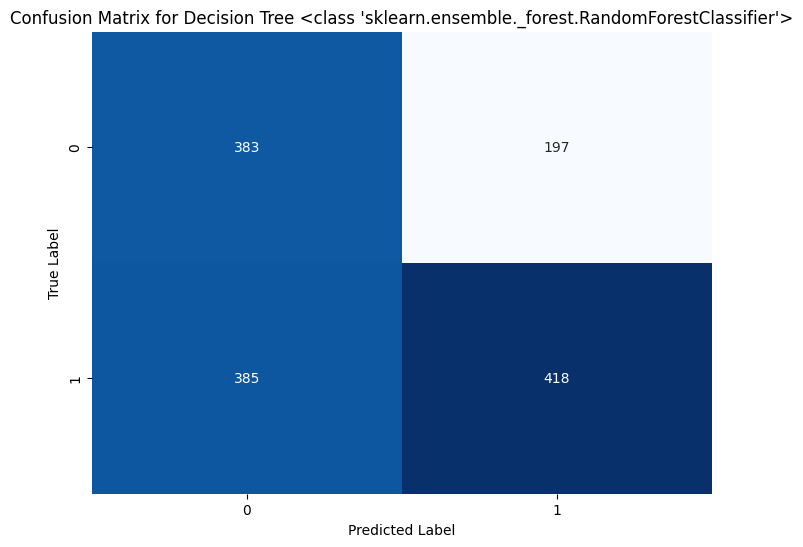

group=[ 0  1  2  3  5  6  8  9 11 12 13 14 15 16 17 18 19 21 22 24 25 26 27 29
 31 32 33 35 36 37 38 39 40 41 44 45 46 47]
group=[ 4  7 10 20 23 28 30 34 42 43]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.5162381596752368
Recall: 0.3861607142857143
Precision: 0.6771037181996086
F1-score: 0.49182658137882024
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.43      0.72      0.54       582
           1       0.68      0.39      0.49       896

    accuracy                           0.52      1478
   macro avg       0.55      0.55      0.52      1478
weighted avg       0.58      0.52      0.51      1478



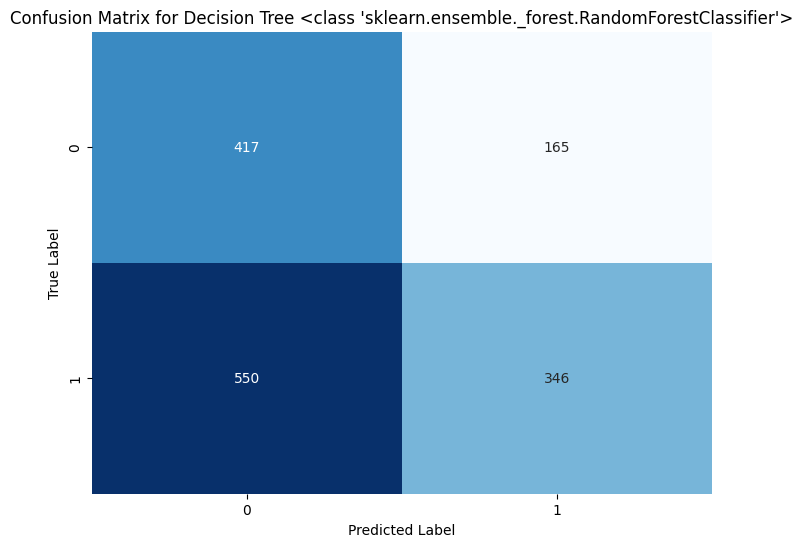

group=[ 2  3  4  5  7  8  9 10 11 12 13 14 15 17 20 21 23 24 25 26 28 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
group=[ 0  1  6 16 18 19 22 27 29 47]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.5805142083897158
Recall: 0.6700421940928271
Precision: 0.7761485826001955
F1-score: 0.7192028985507246
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.14      0.22      0.17       293
           1       0.78      0.67      0.72      1185

    accuracy                           0.58      1478
   macro avg       0.46      0.44      0.45      1478
weighted avg       0.65      0.58      0.61      1478



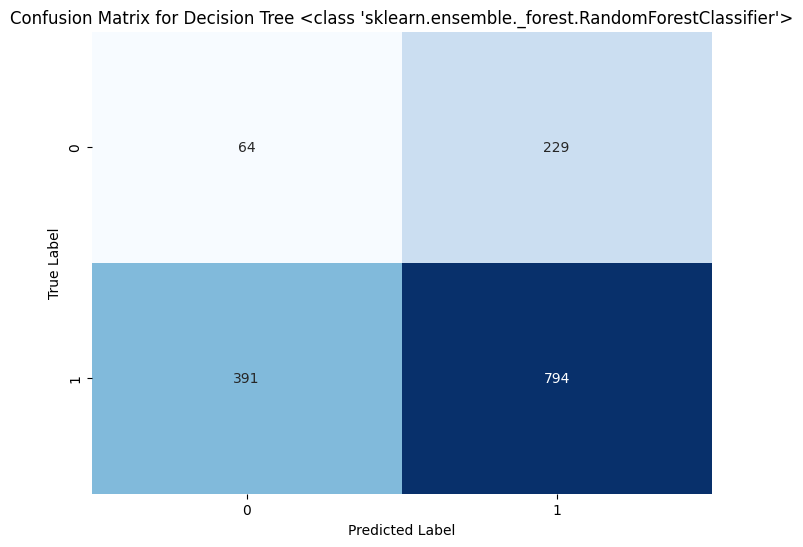

group=[ 0  1  2  3  4  5  6  7  9 10 11 12 14 15 16 17 18 19 20 21 22 23 27 28
 29 30 32 33 34 35 36 38 40 41 42 43 44 45 47]
group=[ 8 13 24 25 26 31 37 39 46]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.308095952023988
Recall: 0.04264099037138927
Precision: 0.12015503875968993
F1-score: 0.06294416243654821
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.35      0.63      0.45       607
           1       0.12      0.04      0.06       727

    accuracy                           0.31      1334
   macro avg       0.24      0.33      0.26      1334
weighted avg       0.23      0.31      0.24      1334



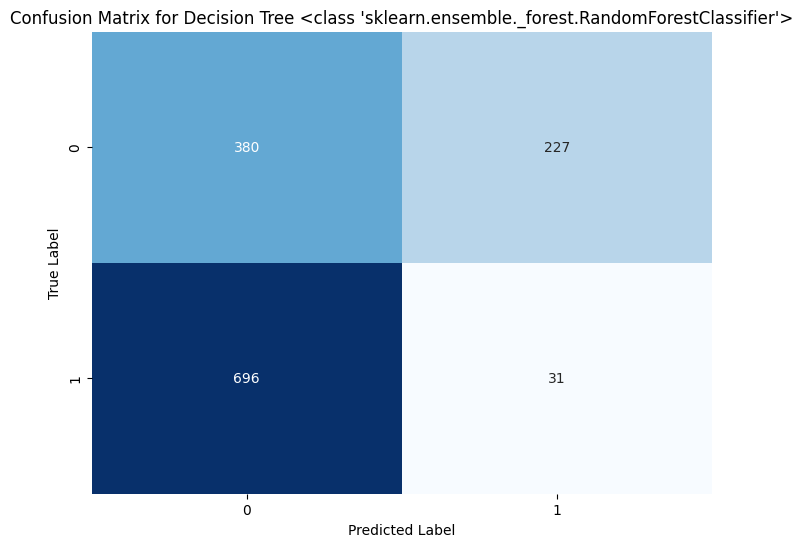

group=[ 0  1  4  5  6  7  8  9 10 12 13 14 16 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 34 35 37 38 39 40 42 43 45 46 47]
group=[ 2  3 11 15 17 32 33 36 41 44]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.4116452268111036
Recall: 0.6002691790040376
Precision: 0.4381139489194499
F1-score: 0.5065303804656446
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.35      0.22      0.27       734
           1       0.44      0.60      0.51       743

    accuracy                           0.41      1477
   macro avg       0.40      0.41      0.39      1477
weighted avg       0.40      0.41      0.39      1477



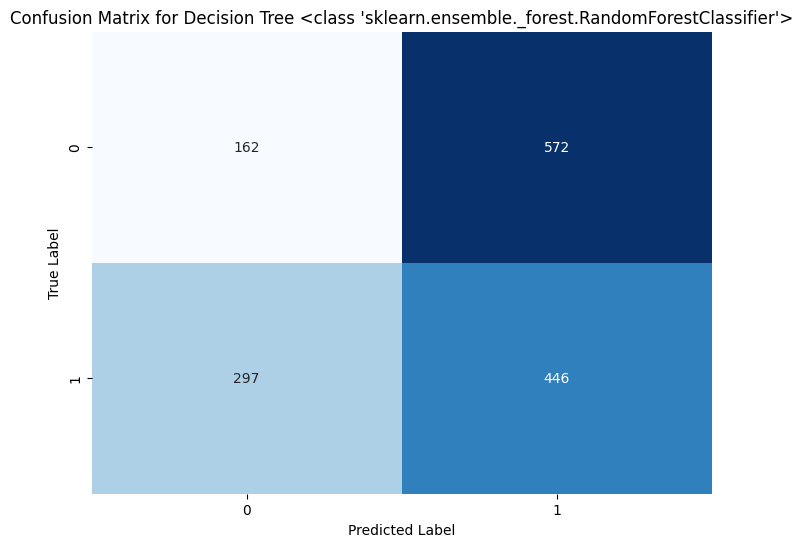

Average accurace : 47.91338503778396
Average  recall : 44.39322045918896
Average  precision : 53.82392170453822
Average  f1 : 47.40133574577438


In [28]:
from sklearn.ensemble import RandomForestClassifier

# # Build and train Random Forest Classifier
# rf_classifier = fit_and_evaluate(RandomForestClassifier(n_estimators=25, random_state=42),
#                                  X_train, y_train,
#                                  X_test, y_test)


CV_ML(data_array, label_array, group_array, RandomForestClassifier(n_estimators=10, random_state=42))

# Sample of DL modedl with CV

In [26]:
gkf=GroupKFold()
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def fit_and_evaluate_DL(model, X_train, y_train, X_test, y_test):

  # Define early stopping callback
  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

  # Train the model using training features and labels
  hist = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  y_pred_binary = (y_pred > 0.5).astype(int)


  # Calculate accuracy, recall, precision, and F1-score
  accuracy = accuracy_score(y_test, y_pred_binary)
  recall = recall_score(y_test, y_pred_binary)
  precision = precision_score(y_test, y_pred_binary)
  f1 = f1_score(y_test, y_pred_binary)

  # Print the results
  print("Accuracy:", accuracy)
  print("Recall:", recall)
  print("Precision:", precision)
  print("F1-score:", f1)


  print("Classification Report (Test):\n", classification_report(y_test, y_pred_binary))
  # Compute the confusion matrix for the test set
  cm_test = confusion_matrix(y_test, y_pred_binary)

  # Plot the confusion matrix for the test set
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title(f"Confusion Matrix for Decision Tree {model.__class__}")
  plt.show()

  return model, accuracy, recall, precision, f1




def CV_DL(data_array , label_array, group_array, model):

  avr_acc = 0
  avr_recall = 0
  avr_prec = 0
  avr_f1 = 0

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      X_train, y_train = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      X_train=scaler.fit_transform(X_train)
      X_test=scaler.transform(X_test)

      y_train[y_train==0] = 1
      y_train[y_train==2] = 0
      y_test[y_test==0] = 1
      y_test[y_test==2] = 0


      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")


      _ , acc , recall, precision, f1 = fit_and_evaluate_DL(model, X_train, y_train, X_test, y_test )
      avr_acc = avr_acc+ acc
      avr_recall = avr_recall+ recall
      avr_prec = avr_prec+ precision
      avr_f1 = avr_f1+ f1

  print(f"Average accurace : {(avr_acc/5)*100}")
  print(f"Average  recall : {(avr_recall/5)*100}")
  print(f"Average  precision : {(avr_prec/5)*100}")
  print(f"Average  f1 : {(avr_f1/5)*100}")

## CNN

**Build Your Model**


In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, concatenate, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def block(input):
    conv1 = Conv1D(32, 2, strides=2, activation='relu', padding="same")(input)
    conv2 = Conv1D(32, 4, strides=2, activation='relu', padding="causal")(input)
    conv3 = Conv1D(32, 8, strides=2, activation='relu', padding="causal")(input)
    x = concatenate([conv1, conv2, conv3], axis=2)
    return x

# Define the input layer with a shape of (1250, 33)
input_layer = Input(shape=( 1250, 33))

# Create the first block
block1 = block(input_layer)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

cnn_out1 = Conv1D(32, 3, activation='relu', padding='same')(block3)
cnn_out2 = Conv1D(32, 3, activation='relu', padding='same')(cnn_out1)
cnn_out3 = MaxPooling1D(pool_size=2)(cnn_out2)
cnn_out4 = Flatten()(cnn_out3)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(cnn_out4)

# Define the model with 'input_layer' as the input and 'predictions' as the output
model = Model(inputs=input_layer, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

group=[ 0  1  2  3  4  6  7  8 10 11 13 15 16 17 18 19 20 22 23 24 25 26 27 28
 29 30 31 32 33 34 36 37 39 41 42 43 44 46 47]
group=[ 5  9 12 14 21 35 38 40 45]
Epoch 1/100
46/46 [==============================] - 6s 60ms/step - loss: 0.6768 - accuracy: 0.5967 - val_loss: 0.6932 - val_accuracy: 0.5770
Epoch 2/100
46/46 [==============================] - 2s 38ms/step - loss: 0.6575 - accuracy: 0.6144 - val_loss: 0.6915 - val_accuracy: 0.5691
Epoch 3/100
46/46 [==============================] - 2s 38ms/step - loss: 0.6440 - accuracy: 0.6241 - val_loss: 0.6926 - val_accuracy: 0.5712
Epoch 4/100
46/46 [==============================] - 2s 38ms/step - loss: 0.6306 - accuracy: 0.6296 - val_loss: 0.7020 - val_accuracy: 0.5799
Epoch 5/100
46/46 [==============================] - 2s 38ms/step - loss: 0.6156 - accuracy: 0.6398 - val_loss: 0.6951 - val_accuracy: 0.5712
Epoch 6/100
46/46 [==============================] - 2s 37ms/step - loss: 0.5968 - accuracy: 0.6716 - val_loss: 0.7181 - val_accu

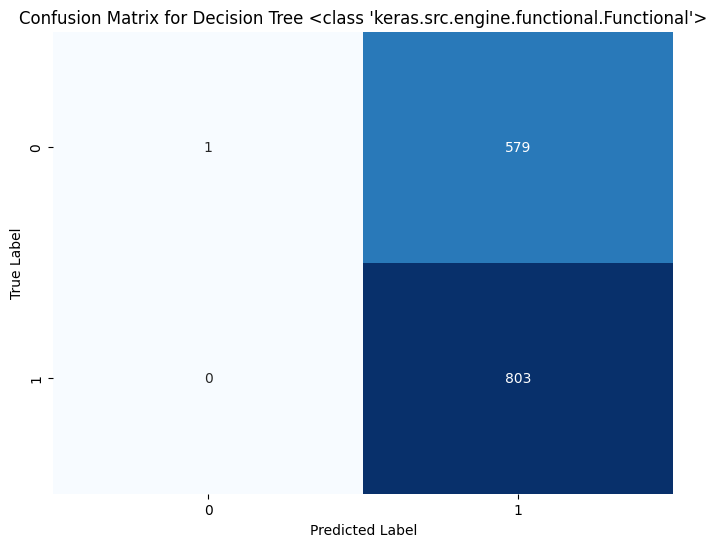

group=[ 0  1  2  3  5  6  8  9 11 12 13 14 15 16 17 18 19 21 22 24 25 26 27 29
 31 32 33 35 36 37 38 39 40 41 44 45 46 47]
group=[ 4  7 10 20 23 28 30 34 42 43]
Epoch 1/100
45/45 [==============================] - 5s 102ms/step - loss: 0.6215 - accuracy: 0.6509 - val_loss: 0.6043 - val_accuracy: 0.6536
Epoch 2/100
45/45 [==============================] - 2s 39ms/step - loss: 0.6045 - accuracy: 0.6668 - val_loss: 0.5981 - val_accuracy: 0.6387
Epoch 3/100
45/45 [==============================] - 2s 39ms/step - loss: 0.5814 - accuracy: 0.6966 - val_loss: 0.5885 - val_accuracy: 0.6475
Epoch 4/100
45/45 [==============================] - 2s 39ms/step - loss: 0.5505 - accuracy: 0.7424 - val_loss: 0.5762 - val_accuracy: 0.6624
Epoch 5/100
45/45 [==============================] - 2s 39ms/step - loss: 0.5074 - accuracy: 0.7809 - val_loss: 0.5584 - val_accuracy: 0.7145
Epoch 6/100
45/45 [==============================] - 2s 39ms/step - loss: 0.4533 - accuracy: 0.8186 - val_loss: 0.5542 - val_acc

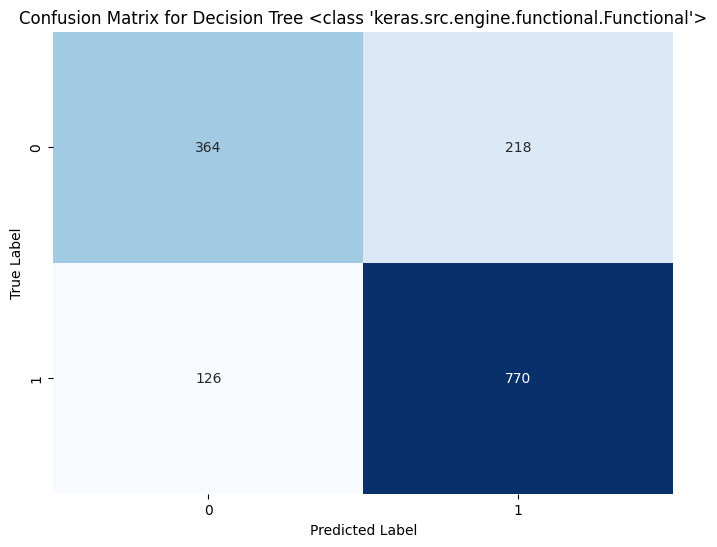

group=[ 2  3  4  5  7  8  9 10 11 12 13 14 15 17 20 21 23 24 25 26 28 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
group=[ 0  1  6 16 18 19 22 27 29 47]
Epoch 1/100
45/45 [==============================] - 3s 57ms/step - loss: 0.4134 - accuracy: 0.8424 - val_loss: 0.1585 - val_accuracy: 0.9763
Epoch 2/100
45/45 [==============================] - 2s 39ms/step - loss: 0.3896 - accuracy: 0.8568 - val_loss: 0.1517 - val_accuracy: 0.9635
Epoch 3/100
45/45 [==============================] - 2s 39ms/step - loss: 0.3538 - accuracy: 0.8685 - val_loss: 0.1488 - val_accuracy: 0.9716
Epoch 4/100
45/45 [==============================] - 2s 39ms/step - loss: 0.3188 - accuracy: 0.8868 - val_loss: 0.1386 - val_accuracy: 0.9628
Epoch 5/100
45/45 [==============================] - 2s 39ms/step - loss: 0.2903 - accuracy: 0.8979 - val_loss: 0.1330 - val_accuracy: 0.9702
Epoch 6/100
45/45 [==============================] - 2s 39ms/step - loss: 0.2642 - accuracy: 0.9053 - val_loss: 0.1364 - val_accu

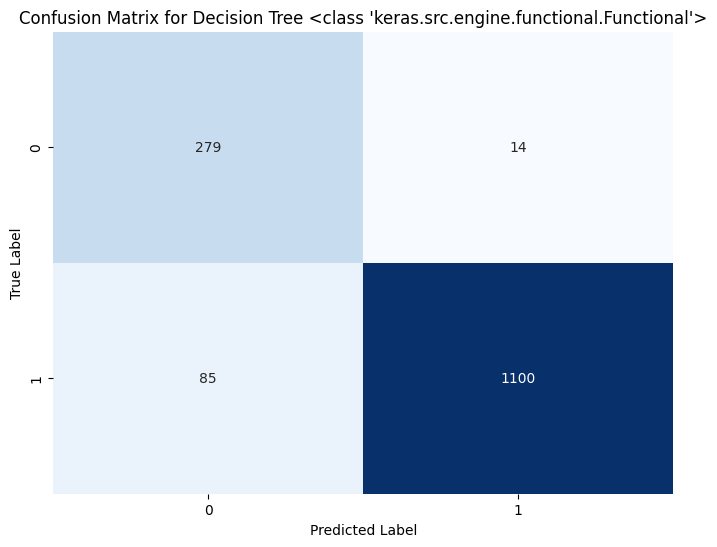

group=[ 0  1  2  3  4  5  6  7  9 10 11 12 14 15 16 17 18 19 20 21 22 23 27 28
 29 30 32 33 34 35 36 38 40 41 42 43 44 45 47]
group=[ 8 13 24 25 26 31 37 39 46]
Epoch 1/100
46/46 [==============================] - 5s 105ms/step - loss: 0.1018 - accuracy: 0.9687 - val_loss: 0.0912 - val_accuracy: 0.9873
Epoch 2/100
46/46 [==============================] - 2s 39ms/step - loss: 0.0832 - accuracy: 0.9775 - val_loss: 0.0927 - val_accuracy: 0.9843
Epoch 3/100
46/46 [==============================] - 2s 39ms/step - loss: 0.0714 - accuracy: 0.9826 - val_loss: 0.0977 - val_accuracy: 0.9790
Epoch 4/100
46/46 [==============================] - 2s 40ms/step - loss: 0.0627 - accuracy: 0.9856 - val_loss: 0.1027 - val_accuracy: 0.9723
Epoch 5/100
46/46 [==============================] - 2s 40ms/step - loss: 0.0550 - accuracy: 0.9873 - val_loss: 0.1015 - val_accuracy: 0.9738
Epoch 6/100
42/42 [==============================] - 1s 18ms/step
Accuracy: 0.7946026986506747
Recall: 0.6286107290233838
Precis

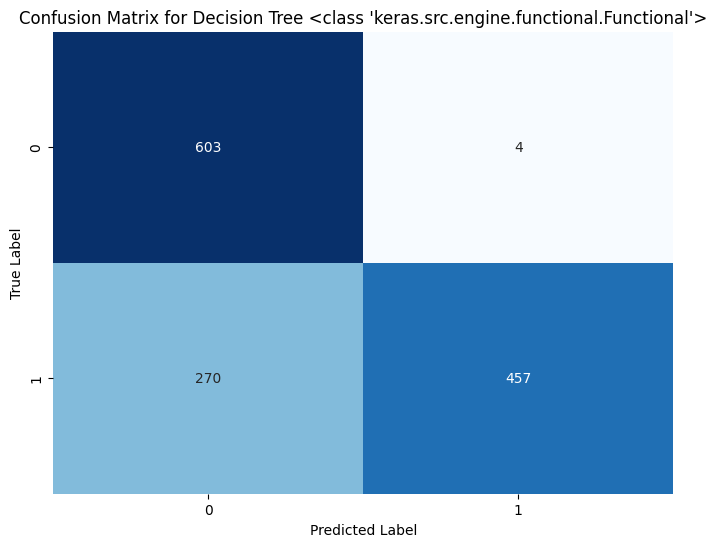

group=[ 0  1  4  5  6  7  8  9 10 12 13 14 16 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 34 35 37 38 39 40 42 43 45 46 47]
group=[ 2  3 11 15 17 32 33 36 41 44]
Epoch 1/100
45/45 [==============================] - 5s 110ms/step - loss: 0.0817 - accuracy: 0.9767 - val_loss: 0.0549 - val_accuracy: 0.9892
Epoch 2/100
45/45 [==============================] - 2s 40ms/step - loss: 0.0615 - accuracy: 0.9875 - val_loss: 0.0623 - val_accuracy: 0.9777
Epoch 3/100
45/45 [==============================] - 2s 40ms/step - loss: 0.0536 - accuracy: 0.9905 - val_loss: 0.0597 - val_accuracy: 0.9898
Epoch 4/100
45/45 [==============================] - 2s 40ms/step - loss: 0.0473 - accuracy: 0.9926 - val_loss: 0.0547 - val_accuracy: 0.9858
Epoch 5/100
45/45 [==============================] - 2s 40ms/step - loss: 0.0457 - accuracy: 0.9905 - val_loss: 0.0718 - val_accuracy: 0.9736
Epoch 6/100
45/45 [==============================] - 2s 40ms/step - loss: 0.0408 - accuracy: 0.9926 - val_loss: 0.0651 - val_acc

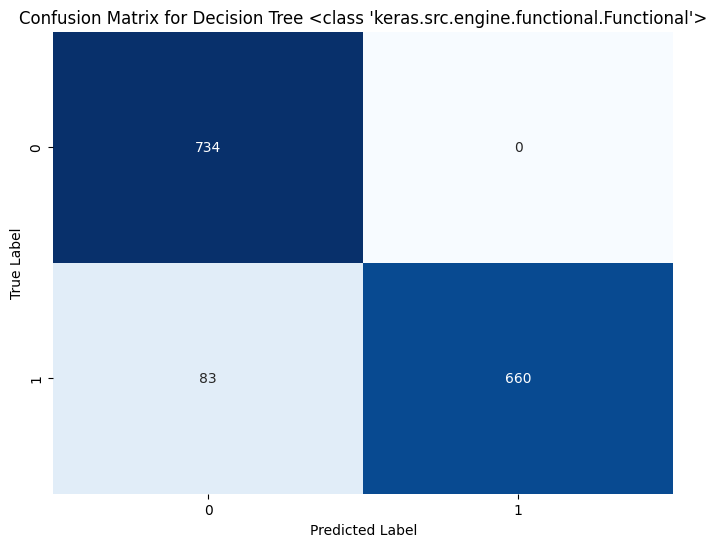

Average accurace : 80.400464943742


In [25]:
CV_DL(data_array, label_array, group_array, model)